## Import qiskit libraries and instantiate sampler

In [2]:
from qiskit import QuantumCircuit, assemble, transpile
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import SamplerV2

sampler = SamplerV2()

### Building a quantum circuit

In [3]:
N_QUBITS = 9
qc_output = QuantumCircuit(N_QUBITS)

# Playing around with Bell circuit
# qc_output.h(0)
# for i in range(1,N_QUBITS):
#     qc_output.cx(0,i)

qc_output.measure_all()
qc_output.draw()

░ ┌─┐                        
   q_0: ─░─┤M├────────────────────────
         ░ └╥┘┌─┐                     
   q_1: ─░──╫─┤M├─────────────────────
         ░  ║ └╥┘┌─┐                  
   q_2: ─░──╫──╫─┤M├──────────────────
         ░  ║  ║ └╥┘┌─┐               
   q_3: ─░──╫──╫──╫─┤M├───────────────
         ░  ║  ║  ║ └╥┘┌─┐            
   q_4: ─░──╫──╫──╫──╫─┤M├────────────
         ░  ║  ║  ║  ║ └╥┘┌─┐         
   q_5: ─░──╫──╫──╫──╫──╫─┤M├─────────
         ░  ║  ║  ║  ║  ║ └╥┘┌─┐      
   q_6: ─░──╫──╫──╫──╫──╫──╫─┤M├──────
         ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_7: ─░──╫──╫──╫──╫──╫──╫──╫─┤M├───
         ░  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_8: ─░──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
         ░  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 9/════╩══╩══╩══╩══╩══╩══╩══╩══╩═
            0  1  2  3  4  5  6  7  8

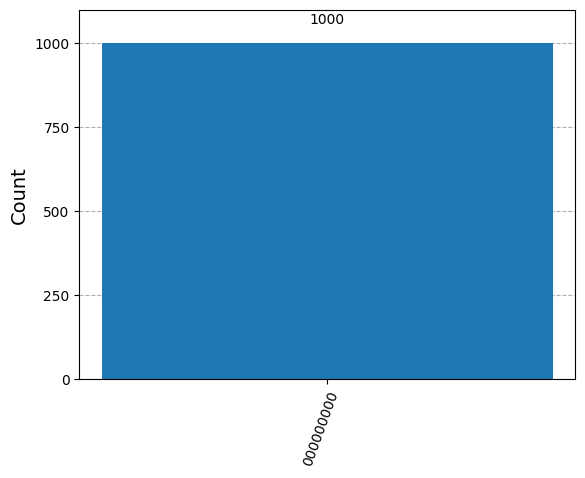

In [4]:
result = sampler.run([qc_output], shots=1000).result()

plot_histogram(result[0].data.meas.get_counts())

### Creating an Adder Circuit

In [5]:
N_ENCODE_QUBITS = 8
qc_encode = QuantumCircuit(N_ENCODE_QUBITS)
qc_encode.x(7)
qc_encode.measure_all()
qc_encode.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
              ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
              ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7

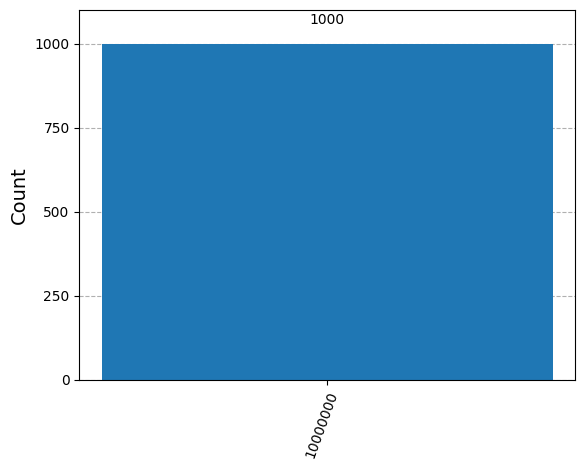

In [6]:
result = sampler.run([qc_encode], shots=1000).result()

plot_histogram(result[0].data.meas.get_counts())

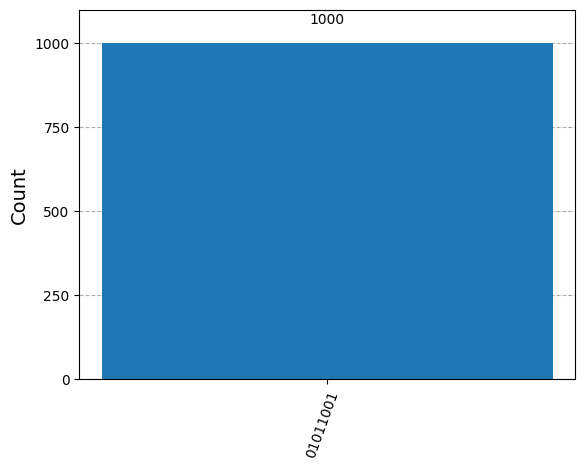

In [7]:
# Encode 89 in binary
qc_encode2 = QuantumCircuit(N_ENCODE_QUBITS)
qc_encode2.x(6) # 64
qc_encode2.x(4) # 16
qc_encode2.x(3) # 8
qc_encode2.x(0) # 1
qc_encode2.measure_all()
result2 = sampler.run([qc_encode2], shots=1000).result()

plot_histogram(result2[0].data.meas.get_counts())

### Creating a half adder

In [22]:
# Define quantum circuit with 4 qubits and 2 classical bits
qc_ha = QuantumCircuit(4, 2)

# Flip the first and second input qubits to make the addition interesting
# Comment one or both of these out to get 01 or 00 instead of 10
qc_ha.x(0)
qc_ha.x(1)

qc_ha.barrier()

# Determine first output qubit with CNOT gates
qc_ha.cx(0,2)
qc_ha.cx(1,2)

# Determine second output qubit with Toffoli gate
qc_ha.ccx(0,1,3)

qc_ha.barrier()

# Extract output via measurement
qc_ha.measure(2,0)
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

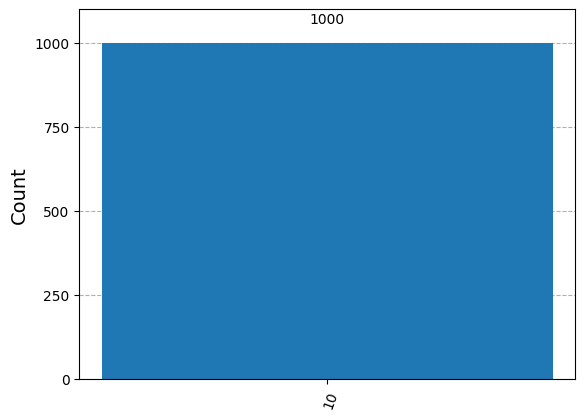

In [23]:
# Run the QC with a sampler and retrieve the results, then plot the result counts
result_ha = sampler.run([qc_ha], shots=1000).result()
plot_histogram(result_ha[0].data.c.get_counts())